In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

review=pd.read_csv("yelp_review.csv")

%matplotlib inline

### yelp_review.csv

In [3]:
print(review.dtypes)
print(review.head())

review_id      object
user_id        object
business_id    object
stars           int64
date           object
text           object
useful          int64
funny           int64
cool            int64
dtype: object
                review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Lov

In [4]:
print(review.tail())

                      review_id                 user_id  \
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   
5261664  -CJNPrDWgIkorx4iEZJXIg  mPjPyipaD0C_myqWqDipZg   
5261665  W9eVvOcpBvG6lpJPoJOxuA  mPjPyipaD0C_myqWqDipZg   
5261666  hqQ1UTFKMN2P1ezUow48OQ  mPjPyipaD0C_myqWqDipZg   
5261667  ldsIs3sGXPJ7WM7VyAm4lQ  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
5261663  Ngk84Ax1tXgpoJFEGxot3w      1  2011-11-21   
5261664  pOEL97ld-FJMKO8Ki8JmYg      3  2016-04-30   
5261665  5ubokMNw8qfbX2WtxgJG1Q      4  2011-10-23   
5261666  EO3i5kTUG7_S2OIQ23sdSA      3  2011-11-07   
5261667  HloEEXm_QzEpycuwA_RtQA      3  2011-11-15   

                                                      text  useful  funny  \
5261663  Bought groupon $39 for 4 months from groupon, ...      36      3   
5261664  Spring rolls was pretty good, cod was a bit ra...       0      0   
5261665  Had a 8 dish set meal, was enough for 10 peopl...       3      0   
5261666  A s

#### How many users are there?

In [5]:
users = review.groupby('user_id')
len(users)

1326101

#### What's the max number of reviews by a user?

In [9]:
users_by_revs = users.size().sort_values(ascending=False)

print(users_by_revs[:10])

top_reviewer = users_by_revs.index[0]

print("\ntop reviewer: ", top_reviewer)

user_id
CxDOIDnH8gp9KXzpBHJYXw    3569
bLbSNkLggFnqwNNzzq-Ijw    2077
PKEzKWv_FktMm2mGPjwd0Q    1611
DK57YibC5ShBmqQl97CKog    1463
QJI9OSEn6ujRCtrX06vs1w    1322
d_TBs6J3twMy9GChqUEXkg    1184
ELcQDlf69kb-ihJfxZyL0A    1159
cMEtAiW60I5wE_vLfTxoJQ    1126
hWDybu_KvYLSdEFzGrniTw    1117
U4INQZOPSUaj8hMjLlZ3KA    1101
dtype: int64

top reviewer:  CxDOIDnH8gp9KXzpBHJYXw


#### Investigate top reviewer's amount of reviews per day

date
2011-02-26    15
2012-08-24    13
2011-06-10    13
2011-05-07    12
2011-02-18    12
2010-12-03    12
2011-11-05    11
2012-03-09    11
2017-07-16    10
2012-02-18    10
dtype: int64


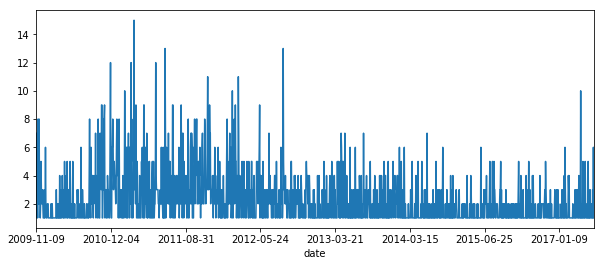

In [31]:
top_user_reviews = review[review.user_id == 'CxDOIDnH8gp9KXzpBHJYXw'].sort_values('date')

top_user_revs_grpd_by_date = top_user_reviews.groupby('date')

top_user_revs_by_date = top_user_revs_grpd_by_date.size()  

print(top_user_revs_by_date.sort_values(ascending=False)[:10])

top_user_revs_by_date.plot(figsize=(10,4))

#### What reviews did the top reviewer give on his or her busiest day?

In [68]:
top_date = review[(review.date == '2011-02-26') & (review.user_id == 'CxDOIDnH8gp9KXzpBHJYXw')]

print(top_date.text)

1736247    Manic Coffee is nice and calm 20 minute before...
1944225    2.5 star\n\nToranj Resto-Bar is dark and dim i...
2128399    Taking Roma's advice about no showers faciliti...
2265865    I found Tsukiji Sushi Village food is similar ...
2354792    Maple Bakery must have a reason to be in busin...
2651335    My first experience of Yerba Mate with my dear...
2651371    Pho Dau Bo's Pho is Not the best Pho I ever at...
2651385    This review is based on Toonie Tuesday at Sunr...
2774737    Thanks for Indie Coffee Passport, if not I wou...
2960866    When all previous yelp reviewers comment how J...
3124122    I just love the big huge windows overlooking N...
3124138    After being to all 3 locations of Kenzo Ramen ...
4191966    mmmmm...Pulled Pork Sandwich...mmmmm\n\nBuster...
4281664    When reheated overnight leftover from George's...
4302717    When I walked by North York Central Library......
Name: text, dtype: object


#### Pho in reviews

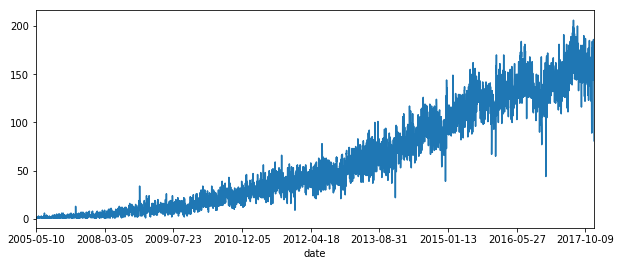

In [103]:
def word_trender(word):
    filt = review['text'].str.extract('(?P<'+word+'>('+word+'))', expand=True)
    index = np.array(filt.notnull())
    word_in_review = review[index[:,0]]
    word_in_review_gb_date = word_in_review.groupby('date')
    word_in_review_gb_date_size = word_in_review_gb_date.size()
    word_in_review_gb_date_size.plot(figsize=(10,4))
    
word_trender("pho")

#### Trying other words (looks like increasing trend due to Yelp popularity, not word popularity growth)
interesting that pho and pizza have similar counts

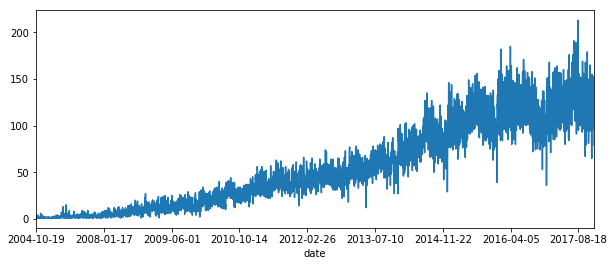

In [105]:
word_trender("pizza")

#### Modify word_trender to normalize by all reviews on date

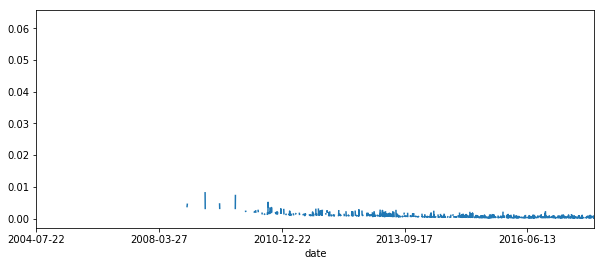

In [139]:
def normalized_word_trender(word):
    filt = review['text'].str.extract('(?P<'+word+'>('+word+'))', expand=True)
    index = np.array(filt.notnull())
    word_in_review = review[index[:,0]]
    word_in_review_gb_date = word_in_review.groupby('date')
    word_in_review_gb_date_ratio = word_in_review_gb_date.size()/review.groupby('date').size()
    word_in_review_gb_date_ratio.plot(figsize=(10,4))
    
normalized_word_trender('yas')

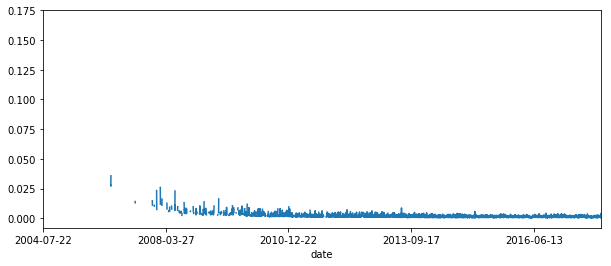

In [109]:
normalized_word_trender('woke')

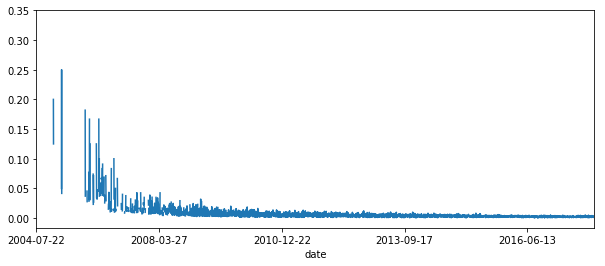

In [110]:
normalized_word_trender('smoking')

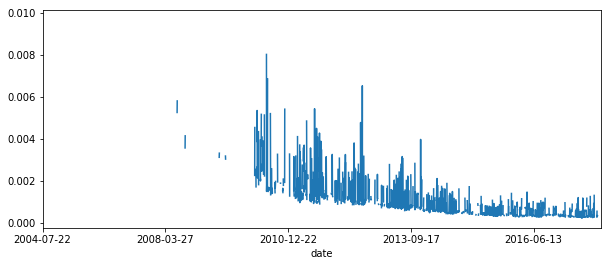

In [129]:
normalized_word_trender('froyo')

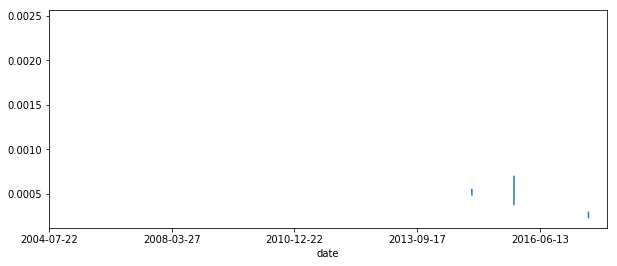

In [130]:
normalized_word_trender('yolo')

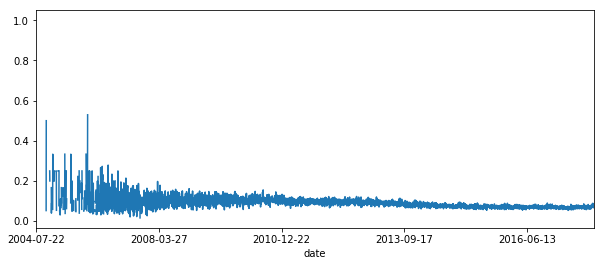

In [136]:
normalized_word_trender('ping')